In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [3]:
# Save the input and target variables
data = diabetes["data"]
target = diabetes['target']


data.shape , target.shape



((442, 10), (442,))

In [4]:
# Normalise the target data (this will make clearer training curves)

#data = data - data.mean(axis = 0) / data.std()
target = (target - target.mean(axis = 0) )/ target.std()


print(data[:1],"\nHeaven" ,target[:1])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]] 
Heaven [-0.01471948]


In [5]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(data,target,random_state = 0,test_size= 0.1)

print(f"Shape : {x_train.shape} {y_train.shape}\n{x_val.shape} {y_val.shape}")

Shape : (397, 10) (397,)
(45, 10) (45,)


#### Train a feedforward neural network model

In [6]:
# Build the model
def getmodel(trainset):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 128,activation = tf.keras.layers.ReLU(),input_shape = (trainset.shape[1],)),
        tf.keras.layers.Dense(units = 128,activation = tf.keras.layers.LeakyReLU(),name = "Dense_2"),
        tf.keras.layers.Dense(units = 128,activation = tf.keras.layers.LeakyReLU(),name = "Dense_3"),
        tf.keras.layers.Dense(units = 128,activation = tf.keras.layers.LeakyReLU(),name = "Dense_4"),
        tf.keras.layers.Dense(units = 128,activation = tf.keras.layers.LeakyReLU(),name = "Dense_5"),
        tf.keras.layers.Dense(units = 128,activation = tf.keras.layers.ReLU(),name = "Dense_6"),
        tf.keras.layers.Dense(units = 1,name = "Dense_7")
    ],name = "ModelSampis")
    
    return model


In [7]:
# Print the model summary
model = getmodel(trainset=x_train)
model.summary()

Model: "ModelSampis"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
Dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
Dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
Dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
Dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
Dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
Dense_7 (Dense)              (None, 1)                 

In [8]:
# Compile the model
optimzer = tf.keras.optimizers.Adam()
loss ="mse"
METRICS = [
    tf.keras.metrics.MeanAbsoluteError(name = "MAE"),
]
model.compile(loss = loss,optimizer = optimzer,metrics= METRICS)

model.loss , model.optimizer

('mse', <tensorflow.python.keras.optimizer_v2.adam.Adam at 0x7f33e9c1d3c8>)

In [9]:
# Train the model, with some of the data reserved for validation

history = model.fit(x_train,y_train,validation_split = 0.15,epochs = 100,batch_size = 64,)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 2s 5ms/sample - loss: 0.9678 - MAE: 0.8420 - val_loss: 1.0771 - val_MAE: 0.8758
Epoch 2/100
337/337 [==============================] - 0s 317us/sample - loss: 0.8198 - MAE: 0.7684 - val_loss: 0.7959 - val_MAE: 0.7447
Epoch 3/100
337/337 [==============================] - 0s 569us/sample - loss: 0.5812 - MAE: 0.6389 - val_loss: 0.6141 - val_MAE: 0.6263
Epoch 4/100
337/337 [==============================] - 0s 331us/sample - loss: 0.5671 - MAE: 0.6108 - val_loss: 0.5480 - val_MAE: 0.5815
Epoch 5/100
337/337 [==============================] - 0s 335us/sample - loss: 0.4987 - MAE: 0.5616 - val_loss: 0.5901 - val_MAE: 0.6550
Epoch 6/100
337/337 [==============================] - 0s 579us/sample - loss: 0.4979 - MAE: 0.5754 - val_loss: 0.5229 - val_MAE: 0.5695
Epoch 7/100
337/337 [==============================] - 0s 324us/sample - loss: 0.4845 - MAE: 0.5523 - val_loss: 0.4969 - val_MAE: 0.550

337/337 [==============================] - 0s 572us/sample - loss: 0.2165 - MAE: 0.3615 - val_loss: 0.5749 - val_MAE: 0.5602
Epoch 61/100
337/337 [==============================] - 0s 319us/sample - loss: 0.2034 - MAE: 0.3511 - val_loss: 0.5879 - val_MAE: 0.5777
Epoch 62/100
337/337 [==============================] - 0s 548us/sample - loss: 0.1920 - MAE: 0.3397 - val_loss: 0.6118 - val_MAE: 0.6187
Epoch 63/100
337/337 [==============================] - 0s 339us/sample - loss: 0.2225 - MAE: 0.3696 - val_loss: 0.6333 - val_MAE: 0.6072
Epoch 64/100
337/337 [==============================] - 0s 577us/sample - loss: 0.2733 - MAE: 0.4209 - val_loss: 0.6492 - val_MAE: 0.5943
Epoch 65/100
337/337 [==============================] - 0s 309us/sample - loss: 0.2568 - MAE: 0.4106 - val_loss: 0.7887 - val_MAE: 0.6535
Epoch 66/100
337/337 [==============================] - 0s 574us/sample - loss: 0.2659 - MAE: 0.4144 - val_loss: 0.6158 - val_MAE: 0.6172
Epoch 67/100
337/337 [=========================

In [10]:
# Evaluate the model on the test set

model.evaluate(x_val,y_val,verbose = 2)

45/1 - 0s - loss: 0.5060 - MAE: 0.6242


[0.5973926981290182, 0.6241607]

#### Plot the learning curves

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

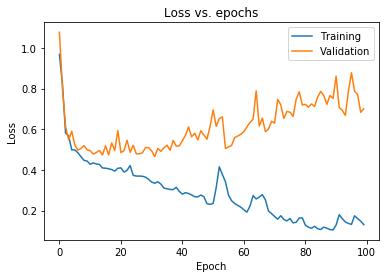

In [12]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [13]:
from tensorflow.keras.layers import Dropout,LeakyReLU,ReLU,Dense
from tensorflow.keras import regularizers

In [14]:
def get_regularised_model(wd, rate):
    model = tf.keras.models.Sequential([
        Dense(128, activation=tf.keras.layers.ReLU(), input_shape=(x_train.shape[1],),
              kernel_regularizer =regularizers.l1_l2(l1 = wd, l2 = wd ),
              name = "Dense_1"),
        Dropout(rate,name ="DO1"),
        Dense(128, activation=LeakyReLU(),kernel_regularizer = regularizers.l1_l2(l1= wd,l2=wd) ,name = "Dense_2"),
        Dropout(rate,name ="DO2"),
        Dense(128, activation=LeakyReLU(),name = "Dense_3"),
        Dropout(rate,name ="DO3"),
        Dense(128, activation=LeakyReLU(), name = "Dense_4"),
        Dropout(rate,name ="DO4"),
        Dense(128, activation=LeakyReLU(),kernel_regularizer =regularizers.l1_l2(l1=wd,l2=wd),name = "Dense_5"),
        Dropout(rate,name ="DO5"),
        Dense(128, activation=ReLU(),kernel_regularizer =regularizers.l1_l2(l1=wd,l2=wd),name = "Dense_6"),
        Dense(1, name = "Output")
    ],name="SAMPIS")
    return model

In [15]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5,0.3)
model.summary()

Model: "SAMPIS"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 128)               1408      
_________________________________________________________________
DO1 (Dropout)                (None, 128)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
DO2 (Dropout)                (None, 128)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
DO3 (Dropout)                (None, 128)               0         
_________________________________________________________________
Dense_4 (Dense)              (None, 128)               16512

In [16]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(lr = 0.005)
METRICS  = [tf.keras.metrics.MeanAbsoluteError(name ="MAE"),
            tf.keras.metrics.RootMeanSquaredError(name="RMSE")
           ]
loss = tf.keras.losses.MeanSquaredError()

model.compile(loss=loss,optimizer=optimizer,metrics=METRICS)

In [17]:
# Train the model, with some of the data reserved for validation

history = model.fit(x_train,y_train,validation_split = 0.15,epochs = 100,batch_size = 64,
         verbose = 1)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 2s 6ms/sample - loss: 0.9572 - MAE: 0.8149 - RMSE: 0.9562 - val_loss: 0.7434 - val_MAE: 0.6536 - val_RMSE: 0.8371
Epoch 2/100
337/337 [==============================] - 0s 333us/sample - loss: 0.6741 - MAE: 0.6632 - RMSE: 0.7947 - val_loss: 0.6835 - val_MAE: 0.6580 - val_RMSE: 0.8006
Epoch 3/100
337/337 [==============================] - 0s 592us/sample - loss: 0.6029 - MAE: 0.6105 - RMSE: 0.7486 - val_loss: 0.6944 - val_MAE: 0.6421 - val_RMSE: 0.8075
Epoch 4/100
337/337 [==============================] - 0s 582us/sample - loss: 0.6983 - MAE: 0.6634 - RMSE: 0.8100 - val_loss: 0.7838 - val_MAE: 0.7546 - val_RMSE: 0.8613
Epoch 5/100
337/337 [==============================] - 0s 581us/sample - loss: 0.6287 - MAE: 0.6287 - RMSE: 0.7660 - val_loss: 0.5407 - val_MAE: 0.5637 - val_RMSE: 0.7062
Epoch 6/100
337/337 [==============================] - 0s 594us/sample - loss: 0.5904 - MAE: 0.6114 - 

337/337 [==============================] - 0s 590us/sample - loss: 0.4602 - MAE: 0.5268 - RMSE: 0.6523 - val_loss: 0.5318 - val_MAE: 0.5869 - val_RMSE: 0.7051
Epoch 49/100
337/337 [==============================] - 0s 579us/sample - loss: 0.4109 - MAE: 0.4947 - RMSE: 0.6134 - val_loss: 0.5506 - val_MAE: 0.5563 - val_RMSE: 0.7184
Epoch 50/100
337/337 [==============================] - 0s 584us/sample - loss: 0.4127 - MAE: 0.4942 - RMSE: 0.6150 - val_loss: 0.5282 - val_MAE: 0.5788 - val_RMSE: 0.7028
Epoch 51/100
337/337 [==============================] - 0s 572us/sample - loss: 0.4571 - MAE: 0.5297 - RMSE: 0.6502 - val_loss: 0.5267 - val_MAE: 0.5394 - val_RMSE: 0.7018
Epoch 52/100
337/337 [==============================] - 0s 599us/sample - loss: 0.4286 - MAE: 0.5082 - RMSE: 0.6280 - val_loss: 0.5058 - val_MAE: 0.5284 - val_RMSE: 0.6868
Epoch 53/100
337/337 [==============================] - 0s 570us/sample - loss: 0.4315 - MAE: 0.5071 - RMSE: 0.6304 - val_loss: 0.5820 - val_MAE: 0.5897 

Epoch 96/100
337/337 [==============================] - 0s 570us/sample - loss: 0.4043 - MAE: 0.4881 - RMSE: 0.6102 - val_loss: 0.6375 - val_MAE: 0.5872 - val_RMSE: 0.7781
Epoch 97/100
337/337 [==============================] - 0s 578us/sample - loss: 0.3914 - MAE: 0.4851 - RMSE: 0.5995 - val_loss: 0.6161 - val_MAE: 0.5662 - val_RMSE: 0.7643
Epoch 98/100
337/337 [==============================] - 0s 326us/sample - loss: 0.3812 - MAE: 0.4709 - RMSE: 0.5909 - val_loss: 0.7131 - val_MAE: 0.6155 - val_RMSE: 0.8253
Epoch 99/100
337/337 [==============================] - 0s 581us/sample - loss: 0.4340 - MAE: 0.5145 - RMSE: 0.6340 - val_loss: 0.6625 - val_MAE: 0.5897 - val_RMSE: 0.7940
Epoch 100/100
337/337 [==============================] - 0s 586us/sample - loss: 0.4396 - MAE: 0.4985 - RMSE: 0.6384 - val_loss: 0.6054 - val_MAE: 0.6017 - val_RMSE: 0.7572


In [18]:
# Evaluate the model on the test set
model.evaluate(x_val,y_val,verbose = 2)


45/1 - 0s - loss: 0.4676 - MAE: 0.5581 - RMSE: 0.7038


[0.5273166418075561, 0.55811435, 0.7037807]

In [19]:
import pandas
df = pandas.DataFrame(history.history)
df.head()

,loss,MAE,RMSE,val_loss,val_MAE,val_RMSE
0,0.957204,0.814874,0.956214,0.743392,0.653559,0.837050
1,0.674131,0.663194,0.794652,0.683525,0.658017,0.800633
2,0.602911,0.610536,0.748617,0.694391,0.642080,0.807498
3,0.698300,0.663390,0.809999,0.783822,0.754567,0.861270
4,0.628744,0.628749,0.765959,0.540736,0.563666,0.706243


#### Plot the learning curves

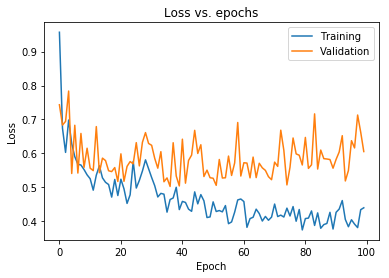

In [20]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(df['loss'])
plt.plot(df['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [59]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class CustomizedCallbacks(Callback):
    
    def on_batch_end(self,batch, logs = None):
        if batch % 2 == 0:
            print("After batch {}, Loss is {:7.2f}".format(batch, logs["loss"]))                  
    def on_test_batch_end(self, batch, logs =None):
        print("After batch {}, Test Loss is {:7.2f}".format(batch, logs["loss"]))
    
    def on_epoch_end(self,epoch,logs=None):
        print("Epoch {}, Average Loss {:7.25} , Mae {}".format(epoch,logs["loss"],logs["MAE"]))
    
    def on_predict_batch_end(self,batch,logs = None):
        print("Finished PRediction on batch {}",format(batch))
    
    def on_epoch_begin(self,epoch, logs = None):
        print(f"Current Epoch {epoch}")

In [54]:
# Re-build the model
model = get_regularised_model(1e-5, 0.3)
model.summary()


Model: "SAMPIS"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 128)               1408      
_________________________________________________________________
DO1 (Dropout)                (None, 128)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
DO2 (Dropout)                (None, 128)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
DO3 (Dropout)                (None, 128)               0         
_________________________________________________________________
Dense_4 (Dense)              (None, 128)               16512

In [60]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(lr = 0.005)
loss = tf.keras.losses.MeanSquaredError()

METRICS = [tf.keras.metrics.MeanAbsoluteError(name = "MAE")]

model.compile(optimizer = optimizer,loss = loss,metrics = METRICS)

#### Train the model with the callback

In [63]:
# Train the model, with some of the data reserved for validation

history = model.fit(x_train, y_train,validation_split = 0.2, callbacks = [CustomizedCallbacks()],
         verbose =False,epochs = 10)

Current Epoch 0
After batch 0, Loss is    0.45
After batch 2, Loss is    0.71
After batch 4, Loss is    0.61
After batch 6, Loss is    0.64
After batch 8, Loss is    0.86
After batch 0, Test Loss is    0.48
After batch 1, Test Loss is    0.61
After batch 2, Test Loss is    0.80
Epoch 0, Average Loss 0.6149171071849787173491109 , Mae 0.6283578276634216
Current Epoch 1
After batch 0, Loss is    0.66
After batch 2, Loss is    0.68
After batch 4, Loss is    0.44
After batch 6, Loss is    0.80
After batch 8, Loss is    0.47
After batch 0, Test Loss is    0.45
After batch 1, Test Loss is    0.59
After batch 2, Test Loss is    0.64
Epoch 1, Average Loss 0.5801278591532060824320638 , Mae 0.5901764035224915
Current Epoch 2
After batch 0, Loss is    0.65
After batch 2, Loss is    0.37
After batch 4, Loss is    0.46
After batch 6, Loss is    0.60
After batch 8, Loss is    0.87
After batch 0, Test Loss is    0.51
After batch 1, Test Loss is    0.62
After batch 2, Test Loss is    0.85
Epoch 2, Aver

In [65]:
# Evaluate the model

model.evaluate(x_val,y_val,verbose = 2)

45/1 - 0s - loss: 0.5534 - MAE: 0.5669


[0.5751359555456373, 0.5668544]

In [66]:
# Make predictions with the model
model.predict(x_val)


array([[ 1.4588577 ],
       [ 1.3175135 ],
       [-0.00587279],
       [-0.51276225],
       [ 0.00739645],
       [ 1.4029833 ],
       [-0.60981315],
       [ 0.912666  ],
       [-0.3547034 ],
       [ 0.8323051 ],
       [-0.18686754],
       [ 0.30204502],
       [-0.64635444],
       [-0.748228  ],
       [ 1.6977981 ],
       [-0.8245491 ],
       [-0.34534466],
       [-0.94440985],
       [-0.688119  ],
       [ 1.313155  ],
       [-0.18532057],
       [-0.3314199 ],
       [ 0.07244335],
       [-0.49825048],
       [ 0.32198298],
       [ 0.01046329],
       [-0.4371292 ],
       [-0.8273416 ],
       [ 0.2243945 ],
       [-0.09080146],
       [ 0.81652606],
       [-0.81158435],
       [-0.39313838],
       [-0.08901046],
       [-0.23521586],
       [ 0.54729795],
       [ 0.00840232],
       [ 0.3386389 ],
       [-0.4616117 ],
       [ 0.9185507 ],
       [-0.72890157],
       [ 0.03343363],
       [-0.25325665],
       [ 0.10388914],
       [ 0.4272096 ]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [91]:
# Re-train the unregularised model
from tensorflow.keras.callbacks import EarlyStopping
modelUnregul = getmodel(x_train)
optimizer = tf.keras.optimizers.Adam(0.005)
loss = tf.keras.losses.MeanSquaredError()
metrics =[tf.keras.metrics.MeanAbsoluteError(name = "MAE"),
         tf.keras.metrics.RootMeanSquaredError(name = "RMSE")]
early_stopping = EarlyStopping(monitor = "val_RMSE",patience = 5,
                               min_delta= 0.01
                          )
modelUnregul.compile(optimizer=optimizer,loss=loss,metrics=metrics,
                    )
unreg_history = modelUnregul.fit(x_train,y_train,validation_split = 0.2,verbose = False,
                          callbacks=[CustomizedCallbacks(),early_stopping],epochs = 100)

Current Epoch 0
After batch 0, Loss is    0.66
After batch 2, Loss is    1.12
After batch 4, Loss is    0.92
After batch 6, Loss is    1.13
After batch 8, Loss is    0.63
After batch 0, Test Loss is    0.59
After batch 1, Test Loss is    0.72
After batch 2, Test Loss is    1.09
Epoch 0, Average Loss 0.7882472773079616246150181 , Mae 0.7265880703926086
Current Epoch 1
After batch 0, Loss is    0.97
After batch 2, Loss is    0.66
After batch 4, Loss is    0.59
After batch 6, Loss is    0.51
After batch 8, Loss is    0.47
After batch 0, Test Loss is    0.81
After batch 1, Test Loss is    0.94
After batch 2, Test Loss is    0.98
Epoch 1, Average Loss 0.620029539715980515524052 , Mae 0.6534687876701355
Current Epoch 2
After batch 0, Loss is    1.16
After batch 2, Loss is    0.39
After batch 4, Loss is    0.53
After batch 6, Loss is    0.97
After batch 8, Loss is    0.69
After batch 0, Test Loss is    0.43
After batch 1, Test Loss is    0.59
After batch 2, Test Loss is    0.75
Epoch 2, Avera

In [84]:
# Evaluate the model on the test set
modelUnregul.evaluate(x_val,y_val,verbose = 2)


45/1 - 0s - loss: 0.4450 - MAE: 0.5497 - RMSE: 0.6994


[0.48909160627259146, 0.5497358, 0.69935083]

In [94]:
# Re-train the regularised model
modelRegulizer = get_regularised_model(1e-5,0.4)
optimizer = tf.keras.optimizers.Adam(0.005)
loss = tf.keras.losses.MeanSquaredError()

metrics = [tf.keras.metrics.MeanAbsoluteError(name = "MAE"),
          tf.keras.metrics.RootMeanSquaredError(name = "RMSE")]
modelRegulizer.compile(optimizer = optimizer,loss = loss, metrics= metrics,
                      )

reg_history = modelRegulizer.fit(x_train,y_train,validation_split = 0.2,
                  callbacks=[CustomizedCallbacks(),early_stopping],
                  epochs = 100,verbose = False)

Current Epoch 0
After batch 0, Loss is    0.90
After batch 2, Loss is    1.10
After batch 4, Loss is    1.00
After batch 6, Loss is    0.74
After batch 8, Loss is    1.15
After batch 0, Test Loss is    0.78
After batch 1, Test Loss is    0.91
After batch 2, Test Loss is    1.30
Epoch 0, Average Loss 1.034920116328290617957464 , Mae 0.8363261222839355
Current Epoch 1
After batch 0, Loss is    1.09
After batch 2, Loss is    0.98
After batch 4, Loss is    0.61
After batch 6, Loss is    0.57
After batch 8, Loss is    0.58
After batch 0, Test Loss is    0.55
After batch 1, Test Loss is    0.70
After batch 2, Test Loss is    0.87
Epoch 1, Average Loss 0.7648591824134441941041018 , Mae 0.7147066593170166
Current Epoch 2
After batch 0, Loss is    0.83
After batch 2, Loss is    0.67
After batch 4, Loss is    0.54
After batch 6, Loss is    0.71
After batch 8, Loss is    0.56
After batch 0, Test Loss is    0.55
After batch 1, Test Loss is    0.61
After batch 2, Test Loss is    0.77
Epoch 2, Avera

In [93]:
# Evaluate the model on the test set
modelRegulizer.evaluate(x_val,y_val,verbose =2)


45/1 - 0s - loss: 0.6360 - MAE: 0.6148 - RMSE: 0.7602


[0.6183866646554735, 0.6148007, 0.76024354]

#### Plot the learning curves

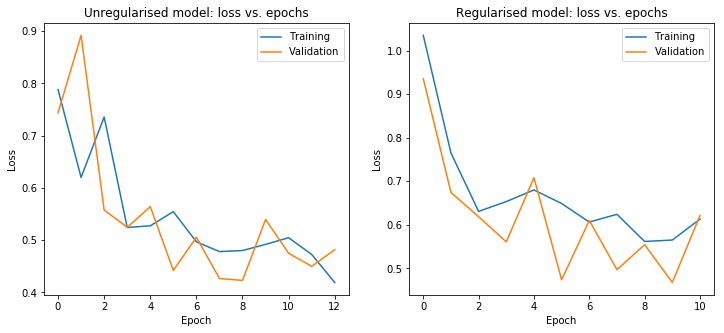

In [95]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()